In [1]:
%pip install tensorflow opencv-python matplotlib kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreelakshmigp/cedardataset")

print("Path to dataset files:", path)

c:\Users\Satgu\Documents\VS Code\2nd year\Forgery Classifier\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Satgu\.cache\kagglehub\datasets\shreelakshmigp\cedardataset\versions\1


In [3]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load Data

In [4]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(path, "signatures"), batch_size=128)

Found 2640 files belonging to 2 classes.


Pre Processing

In [5]:
data = data.map(lambda x,y: (x/255, y))

In [6]:
scaled_iterator = data.as_numpy_iterator()

In [7]:
batch = scaled_iterator.next()

In [8]:
batch[1].max()

np.int32(1)

(array([[[[0.9472793 , 0.9472793 , 0.9472793 ],
         [0.93992823, 0.93992823, 0.93992823],
         [0.9356007 , 0.9356007 , 0.9356007 ],
         ...,
         [0.96373326, 0.96373326, 0.96373326],
         [0.96735495, 0.96735495, 0.96735495],
         [0.9627712 , 0.9627712 , 0.9627712 ]],

        [[0.9277043 , 0.9277043 , 0.9277043 ],
         [0.953238  , 0.953238  , 0.953238  ],
         [0.9480756 , 0.9480756 , 0.9480756 ],
         ...,
         [0.96151906, 0.96151906, 0.96151906],
         [0.95387477, 0.95387477, 0.95387477],
         [0.95303786, 0.95303786, 0.95303786]],

        [[0.9387407 , 0.9387407 , 0.9387407 ],
         [0.9570635 , 0.9570635 , 0.9570635 ],
         [0.9483992 , 0.9483992 , 0.9483992 ],
         ...,
         [0.96134347, 0.96134347, 0.96134347],
         [0.95333207, 0.95333207, 0.95333207],
         [0.9647054 , 0.9647054 , 0.9647054 ]],

        ...,

        [[0.9318485 , 0.9318485 , 0.9318485 ],
         [0.94867253, 0.94867253, 0.94867253

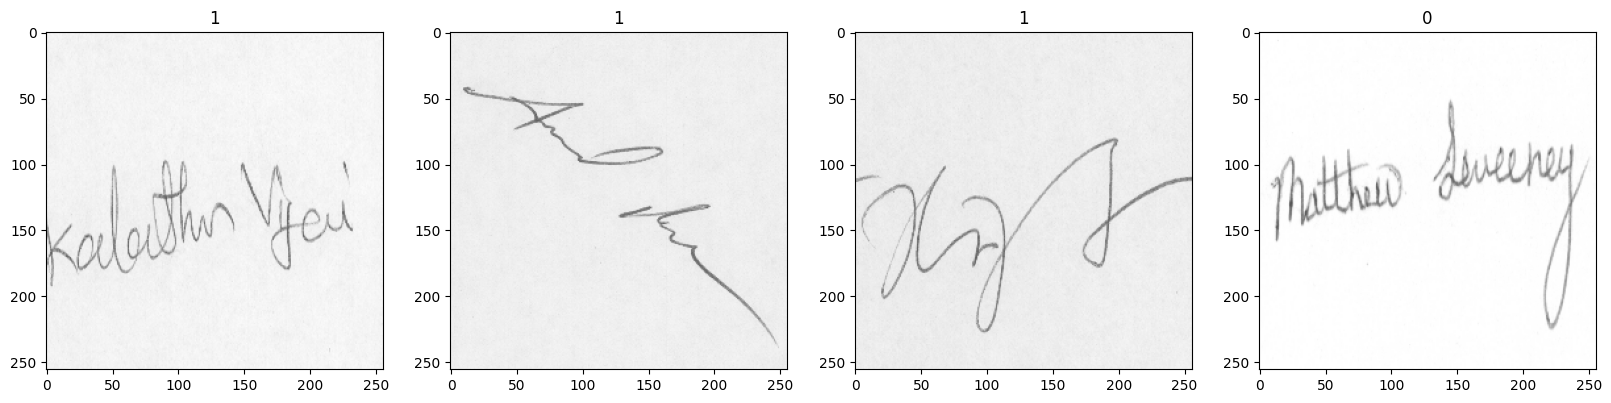

In [9]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    print(batch)

Test Train Split

In [10]:
len(data)

21

In [11]:
train_size = int(0.6*len(data))
test_size = int(0.3*len(data))
val_size = int(0.1*len(data))+1
print(train_size, test_size, val_size)

12 6 3


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Satgu\Documents\VS Code\2nd year\Forgery Classifier\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [19]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5105 - loss: 1.1436 - val_accuracy: 0.5573 - val_loss: 0.6883
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 961ms/step - accuracy: 0.4684 - loss: 0.6952 - val_accuracy: 0.5286 - val_loss: 0.6822
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 877ms/step - accuracy: 0.5006 - loss: 0.6918 - val_accuracy: 0.5521 - val_loss: 0.6696
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 852ms/step - accuracy: 0.6026 - loss: 0.6515 - val_accuracy: 0.6667 - val_loss: 0.6115
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 914ms/step - accuracy: 0.6965 - loss: 0.6051 - val_accuracy: 0.6354 - val_loss: 0.6191
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5711 - loss: 0.6569 - val_accuracy: 0.6484 - val_loss: 0.6684
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 967ms/step - accuracy: 0.6699 - loss: 0.6205 - val_accuracy: 0.6562 - val_loss: 0.6132
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 938ms/step - accuracy: 0.6950 - loss: 0.5936 - val_accuracy: 

In [20]:
hist.history

{'accuracy': [0.525390625,
  0.4954427182674408,
  0.5501301884651184,
  0.6419270634651184,
  0.6998698115348816,
  0.5872395634651184,
  0.6673176884651184,
  0.6946614384651184,
  0.720703125,
  0.7473958134651184,
  0.7884114384651184,
  0.8313801884651184,
  0.8678385615348816,
  0.8684895634651184,
  0.9029948115348816,
  0.8391926884651184,
  0.8795573115348816,
  0.9270833134651184,
  0.9283854365348816,
  0.962890625],
 'loss': [0.9204099178314209,
  0.6915604472160339,
  0.6833422780036926,
  0.6329178810119629,
  0.6363650560379028,
  0.6517898440361023,
  0.6179544925689697,
  0.59258633852005,
  0.5503785014152527,
  0.5177784562110901,
  0.46060582995414734,
  0.38625916838645935,
  0.33277711272239685,
  0.30946213006973267,
  0.2537894546985626,
  0.35156047344207764,
  0.29116663336753845,
  0.215431809425354,
  0.18931935727596283,
  0.1264730840921402],
 'val_accuracy': [0.5572916865348816,
  0.5286458134651184,
  0.5520833134651184,
  0.6666666865348816,
  0.6354166

Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

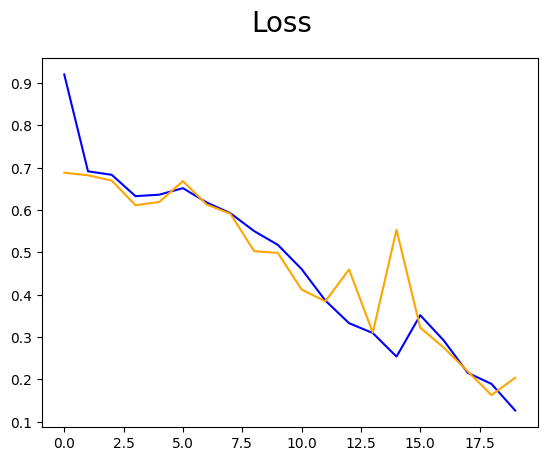

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.show

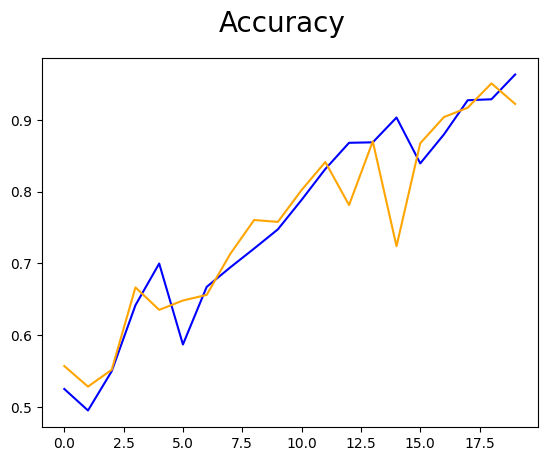

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.show()

Performance Evaluation

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
precision = Precision()
recall = Recall()
Baccuracy = BinaryAccuracy()

In [25]:
len(test)

6

In [26]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    Baccuracy.update_state(y, yhat)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [27]:
print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("Accuracy: ", Baccuracy.result().numpy())

Precision:  0.9724771
Recall:  0.85714287
Accuracy:  0.9138889


Saving model

In [28]:
from tensorflow.keras.models import load_model

In [29]:
model.save(os.path.join('models', 'forgeryclassifier.keras'))

In [30]:
loaded_model = load_model(os.path.join('models', 'forgeryclassifier.keras'))

forged_example = cv2.imread('forgeries_1_14.png')
forged_example = tf.image.resize(forged_example, (256, 256))
loaded_model.predict(np.expand_dims(forged_example/255, 0))